<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

#  Представление команды

Команда: "Guten Tag"<br>
Участники:<br>
Терещенко Елена БПИ162<br>
Коршиков Федор БПИ161<br>
Харченко Артём БПИ161

# Загрузка данных

In [2]:
df_train = pd.read_csv('./postsold-prediction/train.tsv.gz', sep='\t', index_col=0)
df_test = pd.read_csv('./postsold-prediction/test_nolabel.tsv.gz', sep='\t', index_col=0)

In [3]:
df_train.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


In [4]:
df_test.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id
0,9,Челябинск,2018-10-22,True,"Ботильоны канадские 34 размер (35,но маломерят...",3,55.2639,61.3972,Ботильоны,4ec4746e62084fba6280d6651099f316,True,650.0,86156cd607c3238af8982aebc99ae6a5,1,"[{'slug_id': 'sostojanie_garderob', 'slug_name...",Челябинская область,1,902
3,22,Барнаул,2018-11-09,True,"Зимний костюм. Куртка в отличном состоянии, на...",2,53.3426,83.7380,Зимний костюм,180b02e19c8c0140bcd9e719fee0eb2d,True,750.0,76a35a1b4a2d869abfda3365d7cd4c45,1,"[{'slug_id': 'detskie_pol', 'slug_name': 'Пол'...",Алтайский край,1,2204
8,12,Чита,2018-11-27,False,"Продам прекрасный, стильный и шустрый смартфон...",4,52.0883,113.4982,"5.5"" Смартфон Prestigio Grace R5 LTE 16 гб зол...",b9b9b1e11e85acfd5c26e0e51bc734be,True,5500.0,c339765b077a730a5367c5310c64128d,1,"[{'slug_id': 'smartfony_3g', 'slug_name': '3G'...",Забайкальский край,1,1202
9,3,Москва,2018-11-25,True,Горка для купания на присосках. После одного м...,2,55.6932,37.5684,Горка для купания,88c125a4cfa8b806b8ce647b2e2f57da,True,100.0,b3ec786129b0b3bd7dcbce29d6d6232d,1,[],Московская область,1,316
19,22,Бердск,2018-11-04,True,Новый! В наличии! Размер 90 см Доставка по Бер...,2,54.7648,83.0884,Новый костюм,d82287641ee83c962ee0b427031f35d0,True,700.0,751a58cadb565feb070c2a29dd401438,1,"[{'slug_id': 'detskie_tzvet', 'slug_name': 'Цв...",Новосибирская область,1,2214


# Работа с исходными данными. Добавление параметров. Анализ

Данная функция для построения графиков была взята из Discussions на форуме: https://www.kaggle.com/c/postsold-prediction/discussion/94448#latest-543510

In [5]:
def unique_values_bars(data, feature_name, n_top=None):
    
    # Feature values
    feature_values = data[feature_name].values

    # Target labels
    labels = data['sold_fast'].values

    # Unique values
    unique, counts = np.unique(feature_values, return_counts=True)
    
    print("Number of unique values: ", len(unique))
    
    if n_top is None:
        n_top = 10**6
        
    unique_1 = unique[counts.argsort()][-n_top:]
    counts_1 = counts[counts.argsort()][-n_top:]
        
    plt.figure(figsize=(9, 0.25 * len(unique_1)))
    plt.barh(y=range(len(unique_1)), width=counts_1)
    plt.yticks(range(len(unique_1)), unique_1, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Number of values', size=14)
    plt.grid(b=1)
    plt.show()


    probas = []
    for aval in unique:
        labels_for_val = labels[feature_values == aval]
        n = len(labels_for_val)
        n_1 = len(labels_for_val[labels_for_val == 1])
        p = 1.0 * n_1 / n
        probas.append(p)
    probas = np.array(probas)


    unique_2 = unique[probas.argsort()][-n_top:]
    probas_2 = probas[probas.argsort()][-n_top:]

    plt.figure(figsize=(9, 0.25 * len(unique_2)))
    plt.barh(y=range(len(unique_2)), width=probas_2)
    plt.yticks(range(len(unique_2)), unique_2, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Probability to be sold (class 1)', size=14)
    plt.grid(b=1)
    plt.show()

Мы пробуем сгенерировать новые фичи, добавить их в виде новых столбцов в df_train и затем проверить их существенность.

* на основе 'date_created':
    * 'season': 
        * 0 - зима .. 3 - осень 
    * 'weekday': 
        * 0 - понедельник .. 6 - воскресенье

In [6]:
from datetime import date
def dateToWeekDays(dt):
    d = date.fromisoformat(dt)
    return d.weekday()

def dateToSeason(dt):
    d = date.fromisoformat(dt)
    m = d.month
    if m == 1 or m == 2 or m == 12:
        return 0
    elif m >= 3 and m <= 5:
        return 1
    elif m >= 6 and m <= 8:
        return 2
    else:
        return 3
    

df_train['weekday'] = df_train['date_created'].apply(dateToWeekDays)
df_train['season'] = df_train['date_created'].apply(dateToSeason)

In [7]:
df_train 

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,...,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast,weekday,season
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,...,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1,0,3
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,...,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0,0,2
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,...,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0,1,2
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,...,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0,1,1
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,...,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0,4,0
11,11,Гусь-Хрустальный,2018-04-28,False,"Продам детский велосипед,двухколесный,лет для ...",1,55.6063,40.6564,Велосипед детский,9ba6bb7a01bf0e577a36682da64a5dde,...,800.0,c73fd3f12f71c73ad4fa9c1b4b4f3629,1,"[{'slug_id': 'sport_tzvet', 'slug_name': 'Цвет...",Владимирская область,1,1107,0,5,1
12,5,Якутск,2018-02-08,False,"Отдам кота, 8 месяцев, к горшку приучен.",1,62.0355,129.6755,скоттиш страйт,7e0e13efb64cfbb1daf62a87ed63bf1f,...,1.0,be19161f29cc7e6e1795f756ef9e29e0,1,"[{'slug_id': 'koshki_poroda', 'slug_name': 'По...",Республика Саха (Якутия),1,503,0,3,0
13,13,Краснодар,2018-10-14,False,ТВ в рабочем состоянии,3,45.0618,38.9170,LE32R72B,e8e578f2dd291cc1b2e5944cb869028a,...,6000.0,c76ee67dfc81c0f06a3d908370a2f59e,1,"[{'slug_id': 'televizory_marka', 'slug_name': ...",Краснодарский край,1,1302,0,6,3
14,25,Орск,2018-06-02,False,1991 г.в.Пробег около 20000 км. Документы есть...,2,51.2585,58.6035,Минск,a992d673ee26064a0e9d157296244739,...,15000.0,c19620c06a40e40445854c4f665416da,1,"[{'slug_id': 'motocikly_skutery_tip', 'slug_na...",Оренбургская область,1,2503,0,5,2
15,2,Москва,2018-06-20,False,Продаю срочно бу хорошем состоянии два по 1.5 ...,3,55.8134,37.5958,Холодильники бу,fd9f4d97a20b9d279de9b45ba78d5874,...,12000.0,22670ae3efc3d73a3bec355ce05561ea,1,"[{'slug_id': 'oborudovanie_tip', 'slug_name': ...",Московская область,1,202,0,2,2


Number of unique values:  7


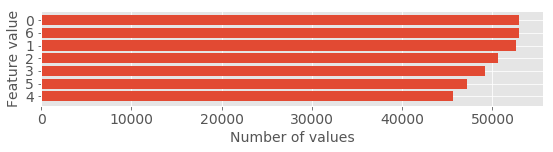

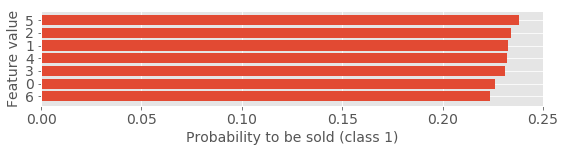

In [8]:
unique_values_bars(df_train, feature_name='weekday')

Number of unique values:  4


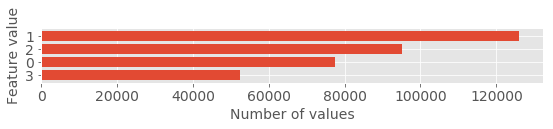

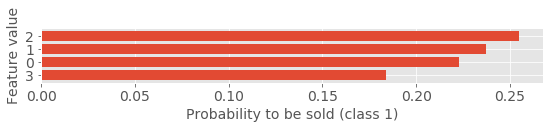

In [9]:
unique_values_bars(df_train, feature_name='season')

* weekday - маловажен
* season - может играть роль

Продолжаем генерировать и проверять фичи:
* на основе 'city':
    * 'city_cat': 
        * подключили файл, сформированный на основе переписи населения 2012 года (данные взяты из интернета). Файл был сформирован вручную в excel. Категория города определяется на основании его населения, где:
            * 0 - Москва, СПБ
            * 1 - население 1.000.000+
            * 2 - население 500.000 - 1.000.000
            * 3 - население 100.000 - 500.000
            * 4 - города, отсутствующие в файле, считаются малочисленными (менее 100.000)

In [10]:
city_cat = pd.read_csv('./CityCategories.csv', sep=',', index_col=0)
list_of_cities = list(city_cat.city)

def cityToCategory(cityname):
    try:
        index = list_of_cities.index(cityname)
    except ValueError:
        index = -1
    index += 1

    if index == 0:
        citycat = 4
    else:
        citycat = city_cat.category[index]
    return citycat

In [11]:
df_train['city_cat'] = df_train['city'].apply(cityToCategory)
df_train

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,...,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast,weekday,season,city_cat
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,...,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1,0,3,2
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,...,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0,0,2,2
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,...,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0,1,2,1
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,...,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0,1,1,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,...,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0,4,0,0
11,11,Гусь-Хрустальный,2018-04-28,False,"Продам детский велосипед,двухколесный,лет для ...",1,55.6063,40.6564,Велосипед детский,9ba6bb7a01bf0e577a36682da64a5dde,...,c73fd3f12f71c73ad4fa9c1b4b4f3629,1,"[{'slug_id': 'sport_tzvet', 'slug_name': 'Цвет...",Владимирская область,1,1107,0,5,1,4
12,5,Якутск,2018-02-08,False,"Отдам кота, 8 месяцев, к горшку приучен.",1,62.0355,129.6755,скоттиш страйт,7e0e13efb64cfbb1daf62a87ed63bf1f,...,be19161f29cc7e6e1795f756ef9e29e0,1,"[{'slug_id': 'koshki_poroda', 'slug_name': 'По...",Республика Саха (Якутия),1,503,0,3,0,3
13,13,Краснодар,2018-10-14,False,ТВ в рабочем состоянии,3,45.0618,38.9170,LE32R72B,e8e578f2dd291cc1b2e5944cb869028a,...,c76ee67dfc81c0f06a3d908370a2f59e,1,"[{'slug_id': 'televizory_marka', 'slug_name': ...",Краснодарский край,1,1302,0,6,3,2
14,25,Орск,2018-06-02,False,1991 г.в.Пробег около 20000 км. Документы есть...,2,51.2585,58.6035,Минск,a992d673ee26064a0e9d157296244739,...,c19620c06a40e40445854c4f665416da,1,"[{'slug_id': 'motocikly_skutery_tip', 'slug_na...",Оренбургская область,1,2503,0,5,2,3
15,2,Москва,2018-06-20,False,Продаю срочно бу хорошем состоянии два по 1.5 ...,3,55.8134,37.5958,Холодильники бу,fd9f4d97a20b9d279de9b45ba78d5874,...,22670ae3efc3d73a3bec355ce05561ea,1,"[{'slug_id': 'oborudovanie_tip', 'slug_name': ...",Московская область,1,202,0,2,2,0


Number of unique values:  5


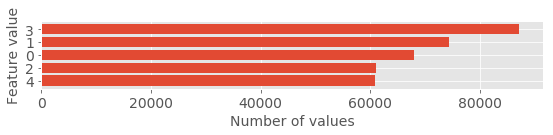

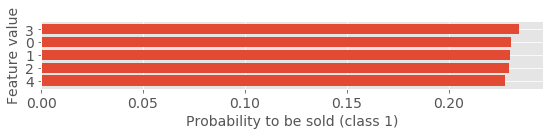

In [12]:
unique_values_bars(df_train, feature_name='city_cat')

city_cat - маловажен

Продолжаем генерировать и проверять фичи:
- на основе 'desc_text':
    * 'text_len': <br>
    Разбиение на категории по длине. Предполагалось использовать его не для подачи на вход модели, а для построения информативного графика. Принцип разбиения:
            * 0 - длина текста до 20 символов
            * 1 - длина текста 20 - 50 символов
            * 2 - длина текста 50 - 150 символов
            * 3 - длина текста 150 - 500 символов
            * 4 - длина текста 500 - 1000 символов
            * 5 - длина текста 1000 - 1500 символов
            * 6 - длина текста 1500+ символов
    <br><br>
    Следующие два параметра не удалось получить в связи с тем, что написанный для них код выполнялся слишком долго. Этот код так и не выполнился до конца ни одного раза, в связи с чем он приведен ниже в закомментированном виде:
    <br><br>
    * 'num_of_pril': <br>
    Количество прилагательных в 'desc_text' <br> <br>
* на основе 'name_text':
    * 'pril_exist': <br>
    Наличие прилагательных в 'name_text

In [13]:
df_train['text_len_cat'] = df_train['desc_text'].apply(lambda x: len(x))

In [14]:
def text_len_to_cat(l):
    cat = 0
    if l>=1500:
        cat = 6
    elif l>=1000:
        cat = 5
    elif l>=500:
        cat = 4
    elif l>=150:
        cat = 3
    elif l>=50:
        cat = 2
    elif l>=20:
        cat = 1
    return cat

In [15]:
df_train['text_len_cat'] = df_train['text_len_cat'].apply(text_len_to_cat)

In [16]:
df_train

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,...,product_type,properties,region,sold_mode,subcategory_id,sold_fast,weekday,season,city_cat,text_len_cat
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,...,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1,0,3,2,2
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,...,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0,0,2,2,3
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,...,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0,1,2,1,2
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,...,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0,1,1,0,3
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,...,1,[],Московская область,1,504,0,4,0,0,2
11,11,Гусь-Хрустальный,2018-04-28,False,"Продам детский велосипед,двухколесный,лет для ...",1,55.6063,40.6564,Велосипед детский,9ba6bb7a01bf0e577a36682da64a5dde,...,1,"[{'slug_id': 'sport_tzvet', 'slug_name': 'Цвет...",Владимирская область,1,1107,0,5,1,4,2
12,5,Якутск,2018-02-08,False,"Отдам кота, 8 месяцев, к горшку приучен.",1,62.0355,129.6755,скоттиш страйт,7e0e13efb64cfbb1daf62a87ed63bf1f,...,1,"[{'slug_id': 'koshki_poroda', 'slug_name': 'По...",Республика Саха (Якутия),1,503,0,3,0,3,1
13,13,Краснодар,2018-10-14,False,ТВ в рабочем состоянии,3,45.0618,38.9170,LE32R72B,e8e578f2dd291cc1b2e5944cb869028a,...,1,"[{'slug_id': 'televizory_marka', 'slug_name': ...",Краснодарский край,1,1302,0,6,3,2,1
14,25,Орск,2018-06-02,False,1991 г.в.Пробег около 20000 км. Документы есть...,2,51.2585,58.6035,Минск,a992d673ee26064a0e9d157296244739,...,1,"[{'slug_id': 'motocikly_skutery_tip', 'slug_na...",Оренбургская область,1,2503,0,5,2,3,2
15,2,Москва,2018-06-20,False,Продаю срочно бу хорошем состоянии два по 1.5 ...,3,55.8134,37.5958,Холодильники бу,fd9f4d97a20b9d279de9b45ba78d5874,...,1,"[{'slug_id': 'oborudovanie_tip', 'slug_name': ...",Московская область,1,202,0,2,2,0,2


Number of unique values:  7


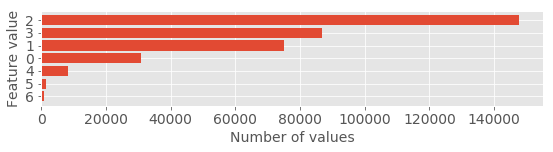

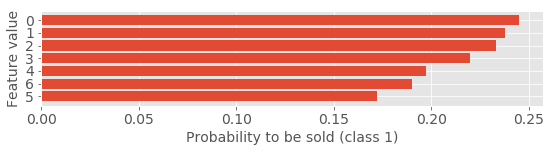

In [17]:
unique_values_bars(df_train, feature_name='text_len_cat')

text_len - может быть информативным

In [18]:
# import nltk
# from pymystem3 import Mystem
# from string import punctuation
# import pymorphy2

# mystem=Mystem()


# def preprocess_text(text):
#     tokens = mystem.lemmatize(text.lower())
#     tokens = [token for token in tokens if token != " "\
#               and token.strip() not in punctuation]
    
#     return tokens


# morph = pymorphy2.MorphAnalyzer()

# def are_any_pril(text):
#     text_dict = preprocess_text(text)
#     pril_count=False
#     for word in text_dict:
#         if (morph.parse(word)[0]).tag.POS == 'ADJF' or (morph.parse(word)[0]).tag.POS == 'ADJS':
#             pril_count = True
#             break
#     if pril_count:
#         return 1
#     else:
#         return 0

## Первая модель (она же дала наилучший лучший результат)

Наша единственная используемая модель - XGBoost. В первую очередь мы попробовали запустить ее на исходных данных, оставив только числовые параметры, заменив город на категорию города и преобразовав логические параметры к числовым. Эта модель дала наилучший результат нашей команды в соревновании. Впоследствии мы добавляли те параметры, которые сгенерировали сами, и которые по графикам показались информативными, но лучшего результата это не дало. Более подробно это будет описано ниже.

In [19]:
df_train['city'] = df_train['city_cat']

In [20]:
df_train['delivery_available'] = (df_train['delivery_available']).astype(int)
df_train['payment_available'] = (df_train['payment_available']).astype(int)

In [21]:
df_train

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,...,product_type,properties,region,sold_mode,subcategory_id,sold_fast,weekday,season,city_cat,text_len_cat
1,4,2,2018-10-08,0,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,...,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1,0,3,2,2
2,4,2,2018-06-18,0,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,...,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0,0,2,2,3
4,9,1,2018-07-31,1,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,...,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0,1,2,1,2
6,3,0,2018-04-17,0,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,...,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0,1,1,0,3
10,5,0,2018-02-09,0,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,...,1,[],Московская область,1,504,0,4,0,0,2
11,11,4,2018-04-28,0,"Продам детский велосипед,двухколесный,лет для ...",1,55.6063,40.6564,Велосипед детский,9ba6bb7a01bf0e577a36682da64a5dde,...,1,"[{'slug_id': 'sport_tzvet', 'slug_name': 'Цвет...",Владимирская область,1,1107,0,5,1,4,2
12,5,3,2018-02-08,0,"Отдам кота, 8 месяцев, к горшку приучен.",1,62.0355,129.6755,скоттиш страйт,7e0e13efb64cfbb1daf62a87ed63bf1f,...,1,"[{'slug_id': 'koshki_poroda', 'slug_name': 'По...",Республика Саха (Якутия),1,503,0,3,0,3,1
13,13,2,2018-10-14,0,ТВ в рабочем состоянии,3,45.0618,38.9170,LE32R72B,e8e578f2dd291cc1b2e5944cb869028a,...,1,"[{'slug_id': 'televizory_marka', 'slug_name': ...",Краснодарский край,1,1302,0,6,3,2,1
14,25,3,2018-06-02,0,1991 г.в.Пробег около 20000 км. Документы есть...,2,51.2585,58.6035,Минск,a992d673ee26064a0e9d157296244739,...,1,"[{'slug_id': 'motocikly_skutery_tip', 'slug_na...",Оренбургская область,1,2503,0,5,2,3,2
15,2,0,2018-06-20,0,Продаю срочно бу хорошем состоянии два по 1.5 ...,3,55.8134,37.5958,Холодильники бу,fd9f4d97a20b9d279de9b45ba78d5874,...,1,"[{'slug_id': 'oborudovanie_tip', 'slug_name': ...",Московская область,1,202,0,2,2,0,2


In [22]:
sold_fast = df_train['sold_fast']
sold_fast

1         1
2         0
4         0
6         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
20        0
22        1
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
32        0
33        0
34        0
35        1
37        0
38        0
39        0
40        0
         ..
508508    1
508509    1
508510    0
508511    0
508512    0
508515    0
508516    0
508517    0
508519    0
508520    0
508522    1
508524    0
508525    0
508526    1
508527    0
508528    0
508531    0
508532    0
508533    0
508534    0
508535    1
508537    0
508538    0
508539    0
508540    0
508541    1
508542    0
508543    0
508547    0
508548    0
Name: sold_fast, Length: 351281, dtype: int64

In [23]:
df_train = df_train.drop('date_created', 1)
df_train = df_train.drop('desc_text', 1)
df_train = df_train.drop('lat', 1)
df_train = df_train.drop('long', 1)
df_train = df_train.drop('name_text', 1)
df_train = df_train.drop('owner_id', 1)
df_train = df_train.drop('properties', 1)
df_train = df_train.drop('region', 1)
df_train = df_train.drop('weekday', 1)
df_train = df_train.drop('season', 1)
df_train = df_train.drop('city_cat', 1)
df_train = df_train.drop('text_len_cat', 1)
df_train = df_train.drop('sold_fast', 1)

In [24]:
df_train = df_train.drop('product_id', 1)

In [25]:
df_train

,category_id,city,delivery_available,img_num,payment_available,price,product_type,sold_mode,subcategory_id
1,4,2,0,3,1,500.0,1,1,410
2,4,2,0,2,0,300.0,1,1,405
4,9,1,1,1,1,1100.0,1,1,908
6,3,0,0,4,1,5000.0,1,1,312
10,5,0,0,2,1,2000.0,1,1,504
11,11,4,0,1,1,800.0,1,1,1107
12,5,3,0,1,0,1.0,1,1,503
13,13,2,0,3,0,6000.0,1,1,1302
14,25,3,0,2,0,15000.0,1,1,2503
15,2,0,0,3,1,12000.0,1,1,202


Здесь создается функция, содержащая в себе все предыдущие шаги, но генерирущая не обучающий, а тестовый датасет. Далее она генерирует тестовый датасет

In [26]:
def prepare_test(df_test):
    df_test['weekday'] = df_test['date_created'].apply(dateToWeekDays)
    df_test['season'] = df_test['date_created'].apply(dateToSeason)
    df_test['city_cat'] = df_test['city'].apply(cityToCategory)
    df_test['city'] = df_test['city_cat']
    df_test['delivery_available'] = (df_test['delivery_available']).astype(int)
    df_test['payment_available'] = (df_test['payment_available']).astype(int)
    df_test['text_len_cat'] = df_test['desc_text'].apply(lambda x: len(x))
    df_test['text_len_cat'] = df_test['text_len_cat'].apply(text_len_to_cat)

    df_test = df_test.drop('date_created', 1)
    df_test = df_test.drop('desc_text', 1)
    df_test = df_test.drop('lat', 1)
    df_test = df_test.drop('long', 1)
    df_test = df_test.drop('name_text', 1)
    df_test = df_test.drop('owner_id', 1)
    df_test = df_test.drop('properties', 1)
    df_test = df_test.drop('region', 1)
    df_test = df_test.drop('weekday', 1)
    df_test = df_test.drop('season', 1)
    df_test = df_test.drop('city_cat', 1)
    df_test = df_test.drop('text_len_cat', 1)
    return df_test
    #не дропаем sold_fast(его нет) и product_id(нужен позже)


In [27]:
df_test = prepare_test(df_test)
df_test

,category_id,city,delivery_available,img_num,payment_available,price,product_id,product_type,sold_mode,subcategory_id
0,9,1,1,3,1,650.0,86156cd607c3238af8982aebc99ae6a5,1,1,902
3,22,2,1,2,1,750.0,76a35a1b4a2d869abfda3365d7cd4c45,1,1,2204
8,12,3,0,4,1,5500.0,c339765b077a730a5367c5310c64128d,1,1,1202
9,3,0,1,2,1,100.0,b3ec786129b0b3bd7dcbce29d6d6232d,1,1,316
19,22,4,1,2,1,700.0,751a58cadb565feb070c2a29dd401438,1,1,2214
21,11,2,1,2,1,4500.0,b11cb67a88b953548a0387d9c711ac1c,1,1,1103
31,22,0,1,4,1,500.0,7280ec64d8c4a5f7bc875125e0a12a98,1,1,2201
36,15,1,0,3,0,8000.0,40f4873e0a467aa76235c32c444de893,1,1,1504
45,14,0,1,2,1,1500.0,6b9a056beb3ce44d13175755899710b7,1,1,1403
47,8,0,0,3,1,750.0,84bac182bb4beba28b0d2497d528e6f9,1,1,809


In [28]:
product_id = df_test['product_id']

In [29]:
df_test = df_test.drop('product_id', 1)

In [30]:
df_test

,category_id,city,delivery_available,img_num,payment_available,price,product_type,sold_mode,subcategory_id
0,9,1,1,3,1,650.0,1,1,902
3,22,2,1,2,1,750.0,1,1,2204
8,12,3,0,4,1,5500.0,1,1,1202
9,3,0,1,2,1,100.0,1,1,316
19,22,4,1,2,1,700.0,1,1,2214
21,11,2,1,2,1,4500.0,1,1,1103
31,22,0,1,4,1,500.0,1,1,2201
36,15,1,0,3,0,8000.0,1,1,1504
45,14,0,1,2,1,1500.0,1,1,1403
47,8,0,0,3,1,750.0,1,1,809


In [31]:
import xgboost as xgb

Разбиваем датасет на трейн-тест в соотношении 60-40. Обучаем модель на 60%, тестируем - на 40. Вычисляем ошибку

In [32]:
size = int(len(df_train.index) * 60 / 100)
df_train1 = df_train.iloc[:size]
df_test1 = df_train.iloc[size:]

sold_fast_train1 = sold_fast.iloc[:size]
sold_fast_test1 = sold_fast.iloc[size:]

In [33]:
params = {
    'objective':'binary:logistic',
    'max_depth':9,
    'silent':1,
    'eta':1
}

num_rounds = 5

xgtrain1 = xgb.DMatrix(df_train1, label=sold_fast_train1 )



bst = xgb.train(params, xgtrain1, num_rounds)

bst

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [34]:
dttest1 = xgb.DMatrix(df_test1)
preds_prob1 = bst.predict(dttest1)
preds_prob1

array([0.13089214, 0.28157264, 0.26199183, ..., 0.28415683, 0.24533826,
       0.16493106], dtype=float32)

In [35]:
labels1 = sold_fast_test1 > 0.5
preds1 = preds_prob1 > 0.5 # threshold
correct = 0

for i in range(len(preds1)):
    if (labels1.iloc[i] == preds1[i]):
        correct += 1

print('Predicted correctly: {0}/{1}'.format(correct, len(preds1)))
print('Error: {0:.4f}'.format(1-(correct/(len(preds1)*1.0))))

Predicted correctly: 107708/140513
Error: 0.2335


Теперь учим модель на полном df_train.

In [36]:
params = {
    'objective':'binary:logistic',
    'max_depth':9,
    'silent':1,
    'eta':1
}

num_rounds = 5

xgtrain = xgb.DMatrix(df_train, label=sold_fast)



bst = xgb.train(params, xgtrain, num_rounds)

bst

In [37]:
dttest = xgb.DMatrix(df_test)
preds_prob = bst.predict(dttest)
preds_prob

array([0.14804243, 0.13400494, 0.29193345, ..., 0.18619913, 0.17944562,
       0.280607  ], dtype=float32)

In [38]:
f = open('bestSolution.csv', 'w')
i = 0
f.write('product_id,score\n')
for pr in product_id:
    f.write(pr)
    f.write(',')
    f.write(str(preds_prob[i]))
    f.write('\n')
    i += 1
    
f.close()

# Интерпретация результатов. Последующие попытки. Итоги

Первое обучение на данных, состоящих из фич: *'category_id', 'city_cat', 'delivery_available', 'img_num', 'payment_available', 'price', 'product_type', 'sold_mode', 'subcategory_id'* дало наилучший результат (0.61121, 0.60364). <br>
Последующие обучения на данных с добавлением новых фич не улучшили результат. Так, при добавление фич, графики которых были информативными, например,  *'text_desc' - символьная длина и 'season'* на выбранной модели обучения оказали негативное влияние на результаты. <br>
Наличие в данных фич *'delivery_available', 'payment_available' и 'sold_mode'* не повлияло на результат.


 - **Изначально существующие и сгенерированные фичи, которые не дали улучшение результата на выбранной модели обучения:**
    * 'season'
    * 'weekday'
    * 'delivery_available'
    * 'payment_available'
    * 'sold_mode'
 - **Фичи, которые имеют большее влияние, чем схожие:**
    * 'category_id' <br>
      Больше влияет чем 'subcategory_id'
 - **Фичи, которые сильно влияют:**
    * 'category_id'
    * 'desc_len'
    * 'img_num'
    * 'price'
    * 'product_type'
    * 'city_cat'<br>
       Влияет на выбранной модели обучения
 - **Фичи, которые можно рассмотреть в дальнейшем:**
    * Количество прилагательных в 'desc_text' 
    * Количество чисел в 'desc_text'
    * Наличие прилагательного в 'name_text'
    * Категоризовать 'region' по доходам населения, проживающего в том или ином регионе
    * 'lat' и 'long' преобразовать в расстояние между координатами города и местоположением продавца